<a href="https://colab.research.google.com/github/rupesh0402/SentimentAnalysis/blob/main/sentiment_analysis_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
#pickle is used to serialize and deserialize to store the state of the model
import pickle
#Joblib is a set of tools to provide lightweight pipelining in Python
import joblib

from sklearn.metrics import confusion_matrix, accuracy_score

# Plotting Data to get insights

In [70]:
data_set = pd.read_csv("/content/Restaurant_Reviews.tsv" , delimiter = "\t", quoting = 3)

In [71]:
data_set

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [72]:
data_set["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

# Cleaning Data for Training

In [73]:
nltk.download('stopwords')

# importing stop words
from nltk.corpus import stopwords

#importing stemmer which will reduce the words to it basic form like better -> good
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#extracting stopwords from english language only
eng_stopwords = stopwords.words('english')
eng_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
#removing spaces/special character/numbers from the text data

corpus=[]
#corpus is a collection of texts used for NLP 

for i in range(0, 1000):
  # removing everything except the alphabets
  review = re.sub('[^a-zA-Z]', ' ', data_set['Review'][i])
  #making it lower case so that Good/good doesn't differ
  review = review.lower()
  
  review = review.split()

  #applying the stemmer on each word
  review = [ps.stem(word) for word in review if not word in set(eng_stopwords)]
  
  review = ' '.join(review)
  corpus.append(review)

In [75]:
corpus


['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# transforming data and storing the bag of words

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

X = cv.fit_transform(corpus).toarray()
y = data_set.iloc[:, -1].values



In [77]:
# Saving BoW dictionary to later use in prediction

bow_path = 'BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# Splitting data into train, test

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
X_train.shape

(670, 1420)

In [80]:
y_train.shape

(670,)

# model training 
#naive bayes gaussian classifier

In [81]:
from sklearn.naive_bayes import GaussianNB
classifier_GNB = GaussianNB()
classifier_GNB.fit(X_train, y_train)

GaussianNB()

In [82]:
# storing the trained NB Classifier to later use in prediction
joblib.dump(classifier_GNB, 'Gaussian_Classifier_Sentiment_Model') 

['Gaussian_Classifier_Sentiment_Model']

# Naive Bayes Multinomial Classifier

In [83]:
from sklearn.naive_bayes import MultinomialNB
classifier_MNB=MultinomialNB()
classifier_MNB.fit(X_train, y_train)

MultinomialNB()

In [84]:
# storing the trained NB Classifier to later use in prediction
joblib.dump(classifier_MNB, 'Multinomial_Classifier_Sentiment_Model')

['Multinomial_Classifier_Sentiment_Model']

#Naive Bayes Bernoulli Classifier

In [85]:
from sklearn.naive_bayes import BernoulliNB
classifier_BNB = BernoulliNB()
classifier_BNB.fit(X_train,y_train)

BernoulliNB()

In [87]:
# storing the trained NB Classifier to later use in prediction
joblib.dump(classifier_BNB, 'Bernoulli_Classifier_Sentiment_Model')

['Bernoulli_Classifier_Sentiment_Model']

# Plotting End results

In [89]:
# values after passing the data through the classifier 
y_pred_GNB = classifier_GNB.predict(X_test)

y_pred_MNB = classifier_MNB.predict(X_test)

y_pred_BNB = classifier_BNB.predict(X_test)


#confusion matrix gives the count of true positives, true negatives and false positives, false negatives



cm_GNB = confusion_matrix(y_test, y_pred_GNB)

cm_MNB = confusion_matrix(y_test, y_pred_MNB)

cm_BNB = confusion_matrix(y_test, y_pred_BNB)

print(cm_GNB)
print( accuracy_score(y_test, y_pred_GNB) )

print("\n\n")

print(cm_MNB)
print(accuracy_score(y_test, y_pred_MNB))

print("\n\n")

print(cm_BNB)

print(accuracy_score(y_test, y_pred_BNB))

[[ 90  83]
 [ 25 132]]
0.6727272727272727



[[136  37]
 [ 37 120]]
0.7757575757575758



[[129  44]
 [ 34 123]]
0.7636363636363637


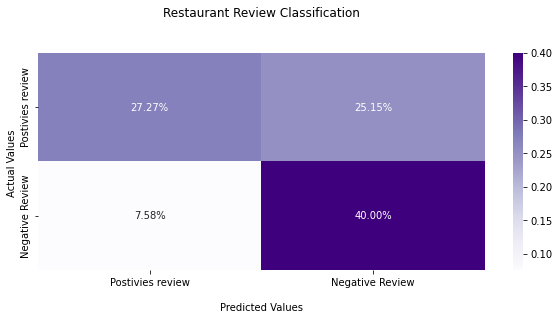

In [92]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(cm_GNB/np.sum(cm_GNB), annot=True,
fmt='.2%', cmap='Purples')
ax.set_title('Restaurant Review Classification Gaussian\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Postivies review','Negative Review'])
ax.yaxis.set_ticklabels(['Postivies review','Negative Review'])
## Display the visualization of the Confusion Matrix.
plt.show()

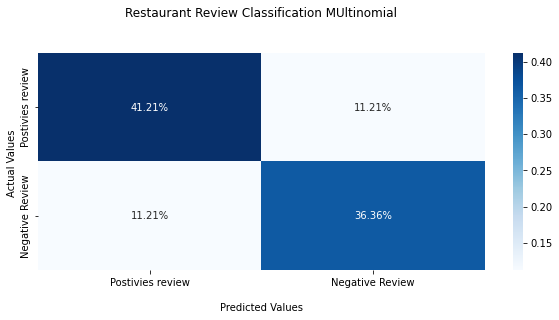

In [93]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(cm_MNB/np.sum(cm_MNB), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Restaurant Review Classification MUltinomial\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Postivies review','Negative Review'])
ax.yaxis.set_ticklabels(['Postivies review','Negative Review'])
## Display the visualization of the Confusion Matrix.
plt.show()

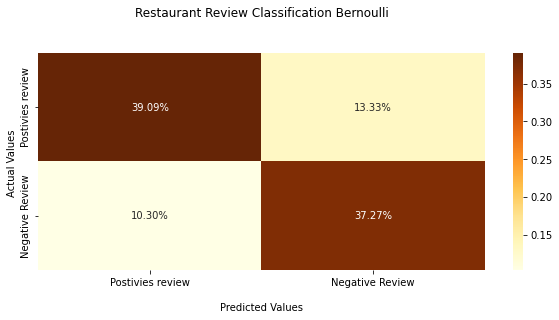

In [95]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(cm_BNB/np.sum(cm_BNB), annot=True,
fmt='.2%', cmap='YlOrBr')
ax.set_title('Restaurant Review Classification Bernoulli\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Postivies review','Negative Review'])
ax.yaxis.set_ticklabels(['Postivies review','Negative Review'])
## Display the visualization of the Confusion Matrix.
plt.show()